# Notebook to test Datasets found in dataset.py
- Checks if elements are returned correctly
- Check transform and norm capabilities
- Test concatenation capabilities


In [4]:
import os
import sys
import numpy as np

sys.path.append('../')
from utils import load_all_fmri_for_subject
from dataset import *

%load_ext autoreload
%autoreload 2

## Test NSD Datasets

In [2]:
nsd_dataset = NSDImageDataset(plot=False,
                                nsd_path='../../StableDiffusionReconstruction/nsd',
                                sub='sub01')

print(max(nsd_dataset.idxs))

72999


In [5]:

betas_path = '../data/betas_nsd'
targets_path = '../data/target_vectors_nsd/z_zeroscope'
metadata_path = '../data/metadata_nsd'

nsd_bt_dataset = NSDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 metadata_path,
                 avg_reps=False, 
                 rois=['BMDgeneral','lPPA','rPPA'],
                 subs=[1],
                 subset='both')
print("dataset len:", len(nsd_bt_dataset))
betas, targets = nsd_bt_dataset[2]
print('betas.shape',betas.shape)
print('targets.shape',targets.shape)
print('betas.max()',betas.max())
print('betas.min()',betas.min())
print('targets.max()',targets.max())
print('targets.min()',targets.min())

self.stim_idxs len for subset both 10000
dataset len: 30000
betas.shape (16640,)
targets.shape (65340,)
betas.max() 4.5055658493134985
betas.min() -3.435439457409122
targets.max() 2.246
targets.min() -2.732


## Test BMD Datasets

In [31]:

betas_path = '../data/betas_cifti_bmd'
targets_path = '../data/target_vectors_bmd/blip'
metadata_path = '../data/metadata_bmd'

bmd_bt_dataset = BMDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 metadata_path,
                 bundle_reps=True, 
                 avg_reps=True,
                 rois=['Group41'],
                 subs=[1,2],
                 subset='all')

print("Dataset length:", len(bmd_bt_dataset))

betas, targets = bmd_bt_dataset[1000]
print("betas.shape, targets.shape", betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

Dataset length: 2204
betas.shape, targets.shape (13156,) (173568,)
1.3434364380912265 -1.7988087297163116 3.1705143 -6.416951


## Test concatenating both BMD and NSD datasets

In [9]:
# concatenate both 
from torch.utils.data import ConcatDataset

concat_dataset = ConcatDataset([nsd_bt_dataset, bmd_bt_dataset])


betas, targets = bmd_bt_dataset[1000]
print(betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

IndexError: list index out of range

# Test HAD Dataset

### HadVideoDataset

Dataset length: 21600
n_frames 15  - frame shape: (244, 244, 3)


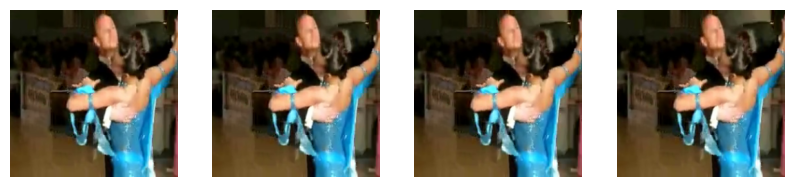

In [7]:
from dataset import HADVideoDataset
from utils import plot_video

had_path = '../data/stimuli_had/'

had_dataset = HADVideoDataset( 
                 had_path, 
                 metadata_path = '../data/metadata_had',
                 subset='all',
                 resolution=244,
                 transform=None,
                 normalize=False,
                 return_filename=False,
                 load_from_frames=False,
                 n_frames_per_video=15)

print('Dataset length:', len(had_dataset))

video = had_dataset[15000]

print('n_frames',len(video),' - frame shape:', video[0].shape)

plot_video(video, frames_to_skip=4)


## HADBetasAndTargetsDataset

In [14]:
# Import necessary modules and classes
from dataset import HADBetasAndTargetsDataset

betas_path = '../data/betas_cifti_had'
targets_path = '../data/target_vectors_had/clip_text_enc_zeroscope'
metadata_path = '../data/metadata_had'

# Instantiate the HADBetasAndTargetsDataset
had_bt_dataset = HADBetasAndTargetsDataset(
                 betas_path, 
                 targets_path, 
                 metadata_path,
                 bundle_reps=False, 
                 avg_reps=False,
                 rois=['Group41'],
                 subs=[1],
                 subset='train')

# Print the length of the dataset
print("Dataset length:", len(had_bt_dataset))

# Retrieve a sample from the dataset
betas, targets = had_bt_dataset[0]

# Print the shapes and values of the betas and targets
print("betas.shape:", betas.shape)
print("targets.shape:", targets.shape)
print("betas.max():", betas.max())
print("betas.min():", betas.min())
print("targets.max():", targets.max())
print("targets.min():", targets.min())


Dataset length: 540
sub01/indiv_npys/ROI_FOLDER_PLACEHOLDER/v_Drum corps_id_Tm3dquc9SNs_start_41.0_label_1_rep0.npy


FileNotFoundError: [Errno 2] No such file or directory: '../data/target_vectors_had/clip_text_enc_zeroscope/Drum corps/v_Drum corps_id_Tm3dquc9SNs_start_41.0_label_1.npy'

## CC2017VideosDataset

self.video_paths ['seg2_begin-068_end-070', 'seg7_begin-440_end-442', 'seg1_begin-364_end-366', 'seg1_begin-138_end-140', 'seg4_begin-156_end-158', 'seg6_begin-428_end-430', 'seg3_begin-092_end-094', 'seg4_begin-244_end-246', 'seg11_begin-022_end-024', 'seg11_begin-364_end-366', 'seg17_begin-044_end-046', 'seg17_begin-252_end-254', 'seg8_begin-008_end-010', 'seg10_begin-050_end-052', 'seg9_begin-196_end-198', 'seg16_begin-280_end-282', 'seg5_begin-114_end-116', 'seg14_begin-156_end-158', 'seg15_begin-064_end-066', 'seg3_begin-116_end-118', 'seg5_begin-046_end-048', 'seg2_begin-166_end-168', 'seg5_begin-350_end-352', 'seg2_begin-446_end-448', 'seg6_begin-238_end-240', 'seg14_begin-242_end-244', 'seg18_begin-298_end-300', 'seg14_begin-226_end-228', 'seg1_begin-360_end-362', 'seg3_begin-244_end-246', 'seg4_begin-138_end-140', 'seg5_begin-416_end-418', 'seg15_begin-450_end-452', 'seg18_begin-328_end-330', 'seg17_begin-120_end-122', 'seg10_begin-278_end-280', 'seg13_begin-376_end-378', 'seg

test3_begin-392_end-394
n_frames 8  - frame shape: (244, 244, 3)


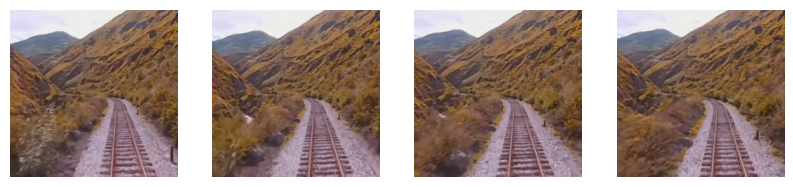

In [28]:
from dataset import CC2017VideoDataset
from utils import plot_video

path = '../data/stimuli_cc2017/'
metadata_path = '../data/metadata_cc2017'

cc_dataset = CC2017VideoDataset( 
                 path, 
                 metadata_path,
                 subset='all',
                 resolution=244,
                 transform=None,
                 normalize=False,
                 return_filename=True,
                 load_from_frames=False,
                 skip_frames=None,
                 n_frames_per_video=8,
                )

print('Dataset length:', len(cc_dataset))

video, fn = cc_dataset[5500]
print(fn)
print('n_frames',len(video),' - frame shape:', video[0].shape)

plot_video(video, frames_to_skip=2)

## CC2017BetasAndTargetDataset

In [8]:
# Import necessary modules and classes
from dataset import CC2017BetasAndTargetsDataset

betas_path = '../data/betas_cifti_cc2017'
targets_path = '../data/target_vectors_cc2017/z_zeroscope'
metadata_path = '../data/metadata_cc2017'

# Instantiate the HADBetasAndTargetsDataset
cc_bt_dataset = CC2017BetasAndTargetsDataset(
                 betas_path, 
                 targets_path, 
                 metadata_path,
                 bundle_reps=False, 
                 avg_reps=True,
                 rois=['Group41'],
                 subs=[1],
                 subset='train')

# Print the length of the dataset
print("Dataset length:", len(cc_bt_dataset))

# Retrieve a sample from the dataset
betas, targets = cc_bt_dataset[0]

# Print the shapes and values of the betas and targets
print("betas.shape:", betas.shape)
print("targets.shape:", targets.shape)
print("betas.max():", betas.max())
print("betas.min():", betas.min())
print("targets.max():", targets.max())
print("targets.min():", targets.min())


Dataset length: 4302
betas.shape: (13156,)
targets.shape: (65340,)
betas.max(): 2.369052528190295
betas.min(): -2.8341495322440604
targets.max(): 4.7439423
targets.min(): -5.929047


In [9]:
cc_bt_dataset[1]

(array([-0.52194516, -0.33797175, -0.05450963, ..., -0.09442912,
         0.04236229, -0.20567488]),
 array([-0.7316799 , -0.06450216, -1.030473  , ...,  0.8200861 ,
         0.23381339,  0.09180671], dtype=float32))

In [3]:
# Copy and rename all files in a folder
import os
folder = '../reconstructions/cc2017_regressor:mlpwithscheduler_rois:Group41_testSub01_trainAllSub_feats:z_zeroscope_blip_strength:0.8'
os.makedirs(f'{folder}/gif_s1', exist_ok=True)
for f in os.listdir(f'{folder}/gif'):
    
    os.system(f'cp {folder}/gif/{f} {folder}/gif_s1/{f.replace(".gif","_s1.gif")}')